***Introduction***



Forbes, the sharpest business journal, published an article about HVAC players evaluating brands based on comfort and reliability.
(https://www.forbes.com/home-improvement/hvac/best-air-conditioning-brands/#york_section)

 - **Lennox** was the most efficient, **Carrier** was considered more intelligent, **Coleman** was the most cost-effective, and the list goes on to include **York** and **Trane**.

 - Among the abovementioned, only **Lennox**,**Carrier**,**Trane** are listed on the New York Stock Exchange (NYSE), which means that their financial data is publicly avialable on the web.

 - Another relevant company has been added to the list: **Midea**, a Chinese company that, while not listed on the NYSE, is traded on OTC markets and has its stock price available on Yahoo Finance.

***The Comparison***

All of these companies are manufacturers and sellers of heating, ventilation, and cooling products that compete globally.  The goal of this nootbook is to compare them from a financial perspective.  The Enterprise Value (EV) - EBITDA ratio is used; the choice is natural, and the argument in the financial literature is that EV allows for comparing companies with different capital structures (Debt & Equity), whereas EBITDA is a preferred choice to evaluate their profitability regardless of their depreciation calculations (which are fundamentally dependent on accounting standards).

The higher the EV/EBITDA ratio, the more "expensive" the company's profit is compared to its peers, and this higher price tag must be justified by the company's growth outlook, as higher growth justifies the price tag when investors value not only the company's current performance but also its future outlook.

***The Data***

Financial statements are easily accessible via the publicly available Yahoo Finance website. Rather than manually pulling the required numbers from each company's website, the library API allows for instant report retrieval, making it useful for automating financial analysis and exploring company finances.

In [86]:
# import the neccessary libraries:
import numpy as np
import pandas as pd
import yfinance as yf # the Yahoo finance API

In [87]:
# tickers are the unique identifers of stocks
tickers = ['LII','CARR','TT'] # media is excluded from the loop because some data is missing

# prepare the empty lists of required metrics for evaluation
EV = [] # The Enterprise Value
EBITDA = [] # The recorded EBITDA
Number_of_shares = [] # the number of shares
Debt = [] # the debt at the end of the year
Cash = [] # the cash at the end of the year
EV_EBITDA = [] # the ratio
Price = [] # closing price at the end of the year
growth = [] # growth at 2024 from past FY 2023
Adj_EV_EBITDA = [] # ratio adjusted per growth
P_E = [] # price over earning ratio
for ticker in tickers: # loop over the tickers
  stock = yf.Ticker(ticker)
  balance = stock.balance_sheet # collect the balance sheet
  income = stock.income_stmt # collect the income statement
  Debt_24 = balance.loc['Net Debt']['2024-12-31'] # Debt
  Cash_24 = balance.loc['Cash And Cash Equivalents']['2024-12-31'] #Cash
  num_of_shares = balance.loc['Ordinary Shares Number']['2024-12-31'] #shares
  hist_prices = stock.history(start='2024-12-31', end='2025-01-01') # a dataframe containing historical prices
  stock_price = hist_prices['Close'].values[0] #only closing price
  stock_EV = Debt_24 - Cash_24 + (num_of_shares * stock_price)
  stock_EBITDA = income.loc['EBITDA']['2024-12-31']
  stock_EV_EBITDA = stock_EV / stock_EBITDA
  stock_EPS = income.loc['Basic EPS']['2024-12-31']
  stock_growth = (income.loc['Total Revenue']['2024-12-31'] -
                  income.loc['Total Revenue']['2023-12-31'] )/ income.loc['Total Revenue']['2023-12-31']
 # create a list of desired metrics for evaluation
  EBITDA.append(round(stock_EBITDA/(10**9),2))
  EV.append(round(stock_EV/(10**9),2))
  Debt.append(round(Debt_24/(10**9),2))
  Cash.append(round(Cash_24/(10**9),2))
  Number_of_shares.append(num_of_shares)
  EV_EBITDA.append(round(stock_EV_EBITDA,2))
  Price.append(round(stock_price,2))
  growth.append(round(stock_growth*100,2))
  Adj_EV_EBITDA.append(round(stock_EV_EBITDA / (stock_growth*100),2))
  P_E.append(round(stock_price / stock_EPS,2))

In [88]:
# same block of code is executed again but for Media stock
stock = yf.Ticker('0300.HK')
balance = stock.balance_sheet
income = stock.income_stmt
#instead of Net Debt which is missing use Total Debt
Debt_24 = balance.loc['Total Debt']['2024-12-31']
Cash_24 = balance.loc['Cash And Cash Equivalents']['2024-12-31']
num_of_shares = balance.loc['Ordinary Shares Number']['2024-12-31']
hist_prices = stock.history(start='2024-12-31', end='2025-01-01')
stock_price = hist_prices['Close'].values[0]
stock_EV = Debt_24 - Cash_24 + (num_of_shares * stock_price)
stock_EBITDA = income.loc['EBITDA']['2024-12-31']
stock_EV_EBITDA = stock_EV / stock_EBITDA
stock_EPS = income.loc['Basic EPS']['2024-12-31']
stock_growth = (income.loc['Total Revenue']['2024-12-31'] -
                income.loc['Total Revenue']['2023-12-31'] )/ income.loc['Total Revenue']['2023-12-31']
EBITDA.append(round(stock_EBITDA/(10**9),2))
EV.append(round(stock_EV/(10**9),2))
Debt.append(round(Debt_24/(10**9),2))
Cash.append(round(Cash_24/(10**9),2))
Number_of_shares.append(num_of_shares)
EV_EBITDA.append(round(stock_EV_EBITDA,2))
Price.append(round(stock_price,2))
growth.append(round(stock_growth*100,2))
Adj_EV_EBITDA.append(round(stock_EV_EBITDA / (stock_growth*100),2))
P_E.append(round(stock_price / stock_EPS,2))

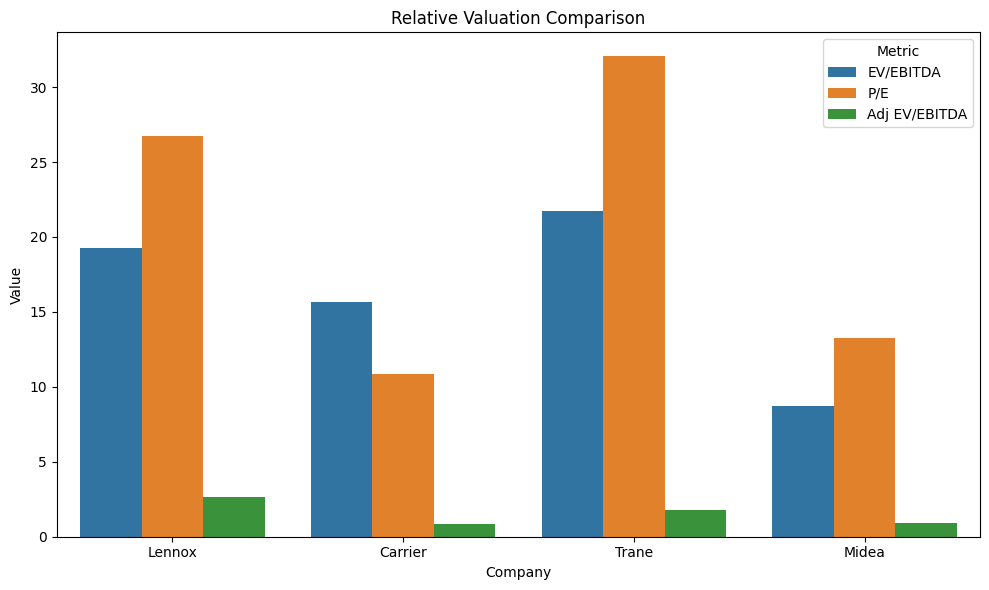

In [89]:
stocks = ['Lennox','Carrier','Trane','Midea'] # a lsit of the companies names
Rel_Evaluation = pd.DataFrame({'Company': stocks,
                               'EV/EBITDA': EV_EBITDA,
                               'Price': Price,
                               'Growth': growth,
                               'Adj EV/EBITDA': Adj_EV_EBITDA,
                               'P/E': P_E})

import matplotlib.pyplot as plt
import seaborn as sns

Valuation_melted = Rel_Evaluation.melt(
    id_vars="Company",
    value_vars=["EV/EBITDA", "P/E", "Adj EV/EBITDA"],
    var_name="Metric",
    value_name="Value"
)



plt.figure(figsize=(10,6))
sns.barplot(data=Valuation_melted, x="Company", y="Value", hue="Metric")

plt.title("Relative Valuation Comparison")
plt.ylabel("Value")
plt.xlabel("Company")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

- **Lennox** & **Trane** are close to each other defining a peer group with an average EV/EBITDA ratio of 20.52, this suggest that two companies are way more expensive than **Carrier** & **Media**.

- To determine whether there is any potential for growth in **Carrier** and **Media** at the end of FY 2024.  **Carrier** had the most significant growth among all companies, but it was valued lower than **Lennox** and **Trane**.

- **Media** may also be undervalued in comparison to its peers, but its growth rate is lower than that of **Carrier**.

Lets stick to **Carrier**:
- The average growth-adjusted EV/EBITDA is 2.23.
- For a "Fair" valuation of the company its current ratio must rise to this level.
- With the recorded growth the New EV/EBITDA must rise to the value of 42.59.
- The current EV for the company is 63.9 \$ Billions, with EBITDA of 4.09 \$ Billions.
- The implied EV under the new valuation is 174 \$ Billions.
- Under this new EV the market cap is updated an a new price of 170 \$ could be projected.

**Closing Comments**

- **Carrier** Clearly, the preceding analysis's target price is overly optimistic; such a dramatic increase is unusual in practice.
- However, the current consensus among analysts promotes buying shares of this company, with price targets ranging from an average of 77 \$ to a maximum of 90 \$.

- As a result, **Carrier** may remain the most interesting of the analyzed companies.



In conclusion this computational notebook was generated on 18/09/2025, it will be very interesting to see how **Carrier** will perform at the end of this year.

P.S The author of this notebook has bough a single share from the company.